<h1> <center> ENSF 519.01 Applied Data Scince </center></h1>
<h2> <center> Assignment 1: Working with data (25 marks)</center></h2>
<h2> <center> Due: Friday Feb 2nd at 4pm. to be submitted at D2L </center></h2>
<h2> <center> <font color='red'>IMPORTANT NOTE: each task must be implemented exactly as asked, even if there are other easier or better solutions.</font> </center></h2>

Assume you are working as a data engineering intern for a news agancy. The project you are involved at requires some data collection, cleaning, and visualization, regarding top movies and directors from IMDB dataset, which you need to deliver in Parts A to E, in this assignment. 


<h1>Part A. Predict Oscar 2018's Nominees (5 marks)</h1>
<br>

Your duty starts with generating a list of potential nominees for best picture award at Oscar 2018, which are among movies that were produced in the last year(2017). The list should consist of the top rated movies based on people’s opinion. You can find the 2017 movies which were among the top 250 movies in the IMDB website. So you need to get the movie data first and then process them to generate the desired list.

To retrieve the data from IMDB you can use the following links that help you start working with imdb python API:
    
    to install imdb package see:
   <a href="https://imdbpy.sourceforge.io/">imdbpy.sourceforge.io/</a> 

    document:
   <a href="https://github.com/alberanid/imdbpy">github.com/alberanid/imdbpy</a> 
   
Or you can install imdb package on notebook by running the following cmd:

!pip install git+https://github.com/alberanid/imdbpy

<h2>Part A.1. Getting last year's top movies, using imdbpy API (3 marks)</h2>

In this section, using imdbpy API, NumPy and standard python, you should create a list of movies which were produced in the last year and were among the top 250 IMDB movies in the following format:

    [{'title': 'Coco', 'rating': 8.5, 'director': ['Lee Unkrich', 'Adrian Molina']}, {NEXT_MOVIE_DICTIONARY},...,{}] 
It means you should return a list of python dictionaries, where each dictionary stores a movie's title, rating and directors list. 

</br>
</br>
<font color='red'>Note: In this part you must properly use NumPy data structures and functions.</font>

In [ ]:
from imdb import IMDb
import numpy as np

ia = IMDb()
LastYearMovies=np.array([])
for movie in ia.get_top250_movies():
    if movie.data["year"]==2017:
        dict={}
        dict.update({'title':movie.data['title']})
        dict.update({'rating':movie.data['rating']})
        directors=[]
        for director in ia.get_movie(movie.getID())['director']:
            directors.append(str(director))
        dict.update({'director':directors})
        LastYearMovies=np.append(LastYearMovies,[dict])

print(LastYearMovies)

<h2>Part A.2. Python's "Filter" and "Lambda" (2 marks)</h2>

The next step is to filter out movies with ratings less than 8.2. Use python's filter function to make a list of dictionaries(which represent movies) with rating>=8.2. 


In [ ]:
BestMovies=np.array([])
for movie in filter(lambda x: x['rating']>=8.2,LastYearMovies):
    BestMovies=np.append(BestMovies,[movie])

print(BestMovies)

<h1>Part B. Web Scraping with BeautifulSoup (3 marks)</h1>

In this part you need to work with BeautifulSoup. 

The task is to find the best director of all times, based on the people's choice.

To get the required data you must first write a code to scrape the following webpage (Directors with the Most Films in the IMDb Top 250) and store the extracted table (directors names and their top films) in a Pandas dataframe: 

   <a href="http://www.imdb.com/list/ls033369077/">http://www.imdb.com/list/ls033369077/</a>  
        
You should store your table as follows: director_name, movie_title (e.g. for alfred hitchcock you should have the following rows in your Dataframe)

            Director_Name         Movie_Title
    0.    Alfred Hitchcock       Psycho (1960)
    1.    Alfred Hitchcock       Rear window (1954)
    2.    Alfred Hitchcock       North by northwest (1959)
    3.    Alfred Hitchcock       Vertigo (1958)
    4.    Alfred Hitchcock       Rebecca (1940)
    5.    Alfred Hitchcock       Dial m for murder (1954)
    6.    Alfred Hitchcock       Strangers on a train (1951)
    7.    Alfred Hitchcock       Notorious (1946)

<font color='red'>Reminder: use urllib.request and BeautifulSoup to read and parse the webpage data. BeautifulSoup needs to be installed first.</font>

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

req = urllib.request.Request('http://www.imdb.com/list/ls033369077/')
html_page =""
with urllib.request.urlopen(req) as response:
    html_page = response.read()
soup = BeautifulSoup(html_page,"lxml")

BestDirectors=[]
for part in soup.find_all("div", {"class":"lister-item mode-detail"}):
    director=str(part.find_all("h3", {"class":"lister-item-header"})[0].find_all('a')[0]).split('>')[1].splitlines()[0].strip().lower()
    for movieSet in part.find_all("div", {"class":"list-description"}):
        for movie in str(movieSet.find_all('p')).split("<br/>")[-1].split("</p>")[0].splitlines():
            Dict={}
            Dict.update({"director":director})
            Dict.update({"movie":movie})
            BestDirectors.append(Dict)

BestDirectors_DF=pd.DataFrame(BestDirectors)
print(BestDirectors_DF)


<h1>Part C. Working with Pandas (8 marks)</h1>

In this section, we continue using the scraped datset from Part B. to rank the best directors, in two steps:

<h2>Part C.1. Hadling Missing Data in Pandas (6 marks)</h2>
<br>
In this section, you need to add the "IMDB ID" and Production Year of each movie, as two new columns, to your (director,movie) dataframe from Part B.1.(You should use IMDBPY API to fetch the ID and the Year of each movie) <b>(1 mark)</b>

You will see that some entries have missing IDs.
- Explian why this has happened. <b>(1 mark)</b>
- Provide two solutions to solve this: a)  by ignoring the movies that are missing IDs <b>(1 mark)</b> and b)  by fixing your script to find the correct IDs using string manipulation. <b>(2 mark)</b>

Finally set the dataframe's index as the IMDB IDs. <b>(1 mark)</b>


In [ ]:
#This code add two new columns with IMDB IDs and Production Year to the prevoius dataframe - Dropping Missing data
import numpy as np

IDcolumn=[]
ProductionYear=[]
for index, row in BestDirectors_DF.iterrows():
    search=ia.search_movie(row['movie']
    
    ID=np.nan
    year=np.nan
    if len(search)>0:
        ID=search[0].getID()
    IDcolumn.append(ID)
    
    try:
        year=int(row['movie'].split('(')[1].split(')')[0].strip())
    except:
        pass
    
    ProductionYear.append(year)

#     print(row['movie'].split('(')[0].strip().lower(),ID,year)
    
print(IDcolumn)
print(ProductionYear)

BestDirectors_DF.insert(0,'IMDB ID',pd.Series(IDcolumn)).insert(1,'year',pd.Series(ProductionYear))
print(BestDirectors_DF)

#Clean The missing rows and setting index
BestDirectors_DF = BestDirectors_DF.dropna()
BestDirectors_DF.set_index('IMDB ID')

In [21]:
#This code add two new columns with IMDB IDs and Production Year to the prevoius dataframe - String Manipulation
import numpy as np

IDcolumn=[]
ProductionYear=[]
for index, row in BestDirectors_DF.iterrows():
    search=ia.search_movie(row['movie'].split('(')[0].strip().lower())
    
    ID=np.nan
    year=np.nan
    if len(search)>0:
        ID=search[0].getID()
    IDcolumn.append(ID)
    
    try:
        year=int(row['movie'].split('(')[1].split(')')[0].strip())
    except:
        pass
    
    ProductionYear.append(year)
    
    print(row['movie'].split('(')[0].strip().lower(),ID,year)
    
print(IDcolumn)
print(ProductionYear)

BestDirectors_DF.insert(0,'IMDB ID',pd.Series(IDcolumn)).insert(1,'year',pd.Series(ProductionYear))
print(BestDirectors_DF)



BestDirectors_DF.set_index('IMDB ID')

,year,director,movie
IMDB ID,,,
0054215,1960.0,alfred hitchcock,Psycho (1960)
0047396,1954.0,alfred hitchcock,Rear Window (1954)
0053125,1959.0,alfred hitchcock,North by Northwest (1959)
0052357,1958.0,alfred hitchcock,Vertigo (1958)
0032976,1940.0,alfred hitchcock,Rebecca (1940)
0046912,1954.0,alfred hitchcock,Dial M for Murder (1954)
0044079,1951.0,alfred hitchcock,Strangers on a Train (1951)
0472198,2009.0,alfred hitchcock,Notorious (1946)
0468569,2008.0,christopher nolan,The Dark Knight (2008)


<h2>Part C.2. Groupby in Pandas (2 marks)</h2>

<br>
Finally, you need to count the number of movies per director, in the genrated dataframe from Part C.1., and then sort the table based on the number of movies and print the head() of the list.

In [49]:
# this code Sort do a group by on 'director column and sorts the result by movie count
ImdbSortedDF=BestDirectors_DF.groupby('director',group_keys=False).count().rename(columns={'movie':'count'}).sort_values(by=['count'],ascending=False).reset_index('director')
ImdbSortedDF.drop(['IMDB ID','year'], axis = 1, inplace = True)
print(ImdbSortedDF.head())

            director  count
0   alfred hitchcock      8
1  christopher nolan      7
2   steven spielberg      7
3    martin scorsese      7
4     akira kurosawa      6


<h1>Part D. Merging DataFrames (4 marks)</h1>

In this part we want to find out if any of the directors that we have in our list of best directors, has produced a film in 2017 that is also in our list of nominees from Part A. To do so you need to make a new dataframe from the table that you had in part A.1. The new dataframe keeps a separate entry for each movie per director, if the movie has more than one director. This means that you should split the rows which have several directors to several rows. <b>(2 marks)</b>

For example, this row {'title': 'Coco', 'rating': 8.5, 'director': ['Lee Unkrich', 'Adrian Molina']} becomes the following two rows:

0  8.5  coco  Lee  Unkrich  

1  8.5  coco  Adrian  Molina  

Now to find out if any of the best directors has produce a movie this year which is among top250, you need to perform a merge operation on the dataframe that you generated and the dataframe that you have from part B.2. <b>(2 marks)</b>

Your code should return a Pandas series of directors. 

In [51]:
#This code Generates the Nominee dataframe 


Nominees=[]
for row in LastYearMovies:
    for director in row['director']:
        RowDict={}
        RowDict.update({'title':row['title'].lower()})
        RowDict.update({'director':director.lower()})
        RowDict.update({'rating':row['rating']})        
        Nominees.append(RowDict)

Nominees=pd.DataFrame(Nominees)
print(Nominees)

            director  rating                                      title
0        lee unkrich     8.5                                       coco
1      adrian molina     8.5                                       coco
2   denis villeneuve     8.2                          blade runner 2049
3    martin mcdonagh     8.2  three billboards outside ebbing, missouri
4    luca guadagnino     8.1                       call me by your name
5      james mangold     8.1                                      logan
6  christopher nolan     8.1                                    dunkirk
7      taika waititi     8.1                             thor: ragnarok


In [53]:
#inner merge on director column

Nominees.merge(ImdbSortedDF,how='inner',on='director')

,director,rating,title,count
0,lee unkrich,8.5,coco,3
1,christopher nolan,8.1,dunkirk,7


<h1>Part E. Visualization - Using Mathplotlib (5 marks)</h1>

In this part we want to generate some visualization of the data that we collected in the previous parts.


<h2>Part E.1 Barplot (2 marks) </h2>
<br>
Using matplotlib, draw a barplot that shows the number of movies that were among the top250 in each year.

To do so, you should first generate a dataframe that stores information about the imdb top250 movies as their title, year of production, and rate of imdb. Then using groupyby you create a new dataframe which aggregates the number of movies per year, as follows:

                           year  rating  count
                        0  1921    8.30      1
                        1  1925    8.20      1
                        2  1926    8.10      1
                        3  1927    8.15      2
                        4  1928    8.10      1

Note that barplot's X-axis shows the years and Y-axis shows the number of movies in each year which were among the imdb top250 movies.

In [40]:

from imdb import IMDb
import numpy as np

ia = IMDb()
Top250=[]
for movie in ia.get_top250_movies():
    dict={}
    dict.update({'title':movie.data['title']})
    dict.update({'year':movie.data['year']})
    dict.update({'rating':movie.data['rating']})
    Top250.append(dict)

Top250=pd.DataFrame(Top250).groupby('year').agg({'rating':'mean', 'title': 'count'}).rename(columns={'title':'count'}).reset_index()
print(Top250.head())

   year  rating  count
0  1921    8.30      1
1  1925    8.20      1
2  1926    8.10      1
3  1927    8.15      2
4  1928    8.10      1


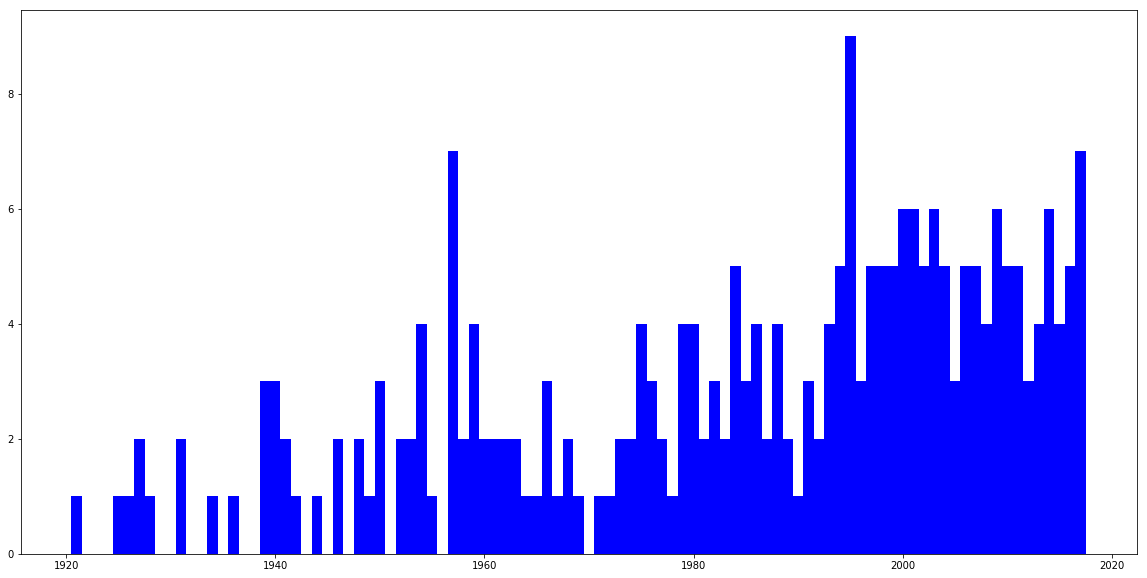

In [41]:
import matplotlib.pyplot as plt

y = Top250['count'].tolist()

N = len(y)
x = Top250['year'].tolist()
width = 1
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x, y, width, color="blue")
#plt.hist(x)
plt.show()


<h2>Part E.2 BoxPlot (3 marks)</h2>

In this section using boxplot, we want to visualize the distribution of production years for movies in the Part C.2. table, per director. The X-axis should represent the top 5 directors (as listed by head() in Part C.2). Use Directors' last names as the lables. The Y-axis represents the Production year. 

<font color='red'>Note: In this section you can only use matplotlib to draw the plot</font>

In [70]:

DirectorYear=[]
for i, row in ImdbSortedDF.head().iterrows():
    years=[]
    Director=row['director']
    for j,entry in BestDirectors_DF.iterrows():
        if row['director']==entry['director']:
            years.append(entry['year'])
    DirectorYear.append({Director:years})
print(DirectorYear)

for each in DirectorYear:
    

[{'alfred hitchcock': [1960.0, 1954.0, 1959.0, 1958.0, 1940.0, 1954.0, 1951.0, 2009.0]}, {'christopher nolan': [2008.0, 2010.0, 2014.0, 2000.0, 2006.0, 2012.0, 2005.0]}, {'steven spielberg': [1993.0, 1998.0, 1981.0, 1989.0, 1993.0, 1975.0, 2002.0]}, {'martin scorsese': [1990.0, 2006.0, 1976.0, 1980.0, 1995.0, 2013.0, 2010.0]}, {'akira kurosawa': [1954.0, 1950.0, 1961.0, 1952.0, 1985.0, 1957.0]}]
